In [27]:
import pandas as pd
import seaborn as sns

In [45]:
vegetation_index = pd.read_csv('/Users/felixhermes/code/miguelferreira13/wildfire_prediction/raw_data/Jan_16/VegetationIndex.csv')

In [50]:
land_class = pd.read_csv('/Users/felixhermes/code/miguelferreira13/wildfire_prediction/raw_data/Jan_16/LandClass.csv')

In [36]:
vegetation_index

,Region,Date,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
Date,,,,,,,
1/1/2005,NSW,1/1/2005,0.349202,0.9972,-0.2,0.204862,0.041968
2/1/2005,NSW,2/1/2005,0.357403,0.9772,-0.2,0.208673,0.043544
3/1/2005,NSW,3/1/2005,0.354087,0.9750,-0.2,0.209450,0.043869
4/1/2005,NSW,4/1/2005,0.347242,0.9904,-0.2,0.207307,0.042976
5/1/2005,NSW,5/1/2005,0.345526,0.9972,-0.2,0.202858,0.041151
...,...,...,...,...,...,...,...
8/1/2020,WA,8/1/2020,0.255785,0.9692,-0.2,0.155347,0.024133
9/1/2020,WA,9/1/2020,0.234510,0.9849,-0.2,0.126898,0.016103
10/1/2020,WA,10/1/2020,0.213640,0.9782,-0.2,0.099860,0.009972


In [10]:
land_class.head()

,Region,Shrubs,Herbaceous vegetation,Cultivated and managed vegetation/agriculture (cropland),Urban / built up,Bare / sparse vegetation,Permanent water bodies,Herbaceous wetland,"Closed forest, evergreen, broad leaf","Closed forest, deciduous broad leaf","Closed forest, unknown","Open forest, evergreen broad leaf","Open forest, deciduous broad leaf","Open forest, unknown definitions",Open sea
0,NSW,6.2,43.6,13.0,0.3,0.2,0.2,0.1,14.7,6.8,0.3,0.5,3.7,10.3,0.1
1,NT,18.1,48.9,0.1,0.0,0.4,0.1,0.1,1.0,7.7,0.1,0.1,13.6,9.3,0.5
2,QL,9.5,45.3,1.6,0.1,1.1,0.1,0.0,5.3,13.3,0.3,0.1,12.0,11.0,0.3
3,SA,24.1,54.8,5.8,0.1,4.8,1.2,0.1,0.3,1.3,0.1,0.1,1.4,5.3,0.6
4,TA,0.7,23.8,1.2,0.2,0.1,1.9,1.4,50.1,0.6,1.1,7.2,1.5,7.2,3.0


In [15]:
land_class.sum(axis = 1)

0    100.0
1    100.0
2    100.0
3    100.0
4    100.0
5    100.0
6    100.0
dtype: float64

## What does the vegetation index mean?

- it's meant for inter-comparisons of terrestrial photosynthetic activity and canopy structural variations
- fancy way of saying we compare how dry or green an area is 
- so it is lower at hotter times of the year and higher at colder times of the year
- also it is higher in cooler states which makes sense 

## What does the land class mean?

- for each state it is shown, what percentage of it is for example urban 

In [17]:
land_class.nunique()

Region                                                      7
Shrubs                                                      7
Herbaceous vegetation                                       7
Cultivated and managed vegetation/agriculture (cropland)    7
Urban / built up                                            5
Bare / sparse vegetation                                    6
Permanent water bodies                                      6
Herbaceous wetland                                          4
Closed forest, evergreen, broad leaf                        7
Closed forest, deciduous broad leaf                         7
Closed forest, unknown                                      4
Open forest, evergreen broad leaf                           4
Open forest, deciduous broad leaf                           7
Open forest, unknown definitions                            7
Open sea                                                    7
dtype: int64

In [25]:
vegetation_index = vegetation_index.set_index(vegetation_index['Date'])
#.drop(columns = 'Date')

/Users/felixhermes/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Region', ylabel='Vegetation_index_mean'>

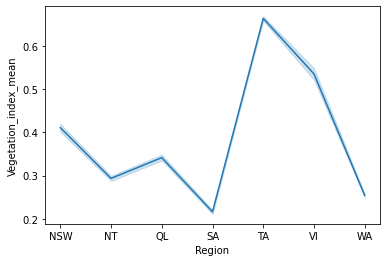

In [40]:
sns.lineplot(vegetation_index['Region'], vegetation_index['Vegetation_index_mean'])

In [46]:
vegetation_index['year'] = pd.DatetimeIndex(vegetation_index['Date']).year

In [47]:
vegetation_index['month'] = pd.DatetimeIndex(vegetation_index['Date']).month

In [48]:
vegetation_index

,Region,Date,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance,year,month
0,NSW,1/1/2005,0.349202,0.9972,-0.2,0.204862,0.041968,2005,1
1,NSW,2/1/2005,0.357403,0.9772,-0.2,0.208673,0.043544,2005,2
2,NSW,3/1/2005,0.354087,0.9750,-0.2,0.209450,0.043869,2005,3
3,NSW,4/1/2005,0.347242,0.9904,-0.2,0.207307,0.042976,2005,4
4,NSW,5/1/2005,0.345526,0.9972,-0.2,0.202858,0.041151,2005,5
...,...,...,...,...,...,...,...,...,...
1339,WA,8/1/2020,0.255785,0.9692,-0.2,0.155347,0.024133,2020,8
1340,WA,9/1/2020,0.234510,0.9849,-0.2,0.126898,0.016103,2020,9
1341,WA,10/1/2020,0.213640,0.9782,-0.2,0.099860,0.009972,2020,10
1342,WA,11/1/2020,0.205688,0.9919,-0.2,0.092952,0.008640,2020,11


In [49]:
vegetation_index.to_csv('/Users/felixhermes/code/miguelferreira13/wildfire_prediction/wildfire_prediction/data/VegetationIndex.csv')

In [51]:
land_class.to_csv('/Users/felixhermes/code/miguelferreira13/wildfire_prediction/wildfire_prediction/data/Landclass.csv')